### Import all dependencies

In [1]:
pip install --upgrade tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/27/7e/9699c0ebd2bf124df8446bc4767390c023f7bb2d072b7ff92ae7f3fc1379/tensorflow-2.14.0-cp39-cp39-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp39-cp39-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/29/ab/79512973474b56a7f9efef2cab0ec2f803759e90e1b65ff0383d2b0788c4/tensorflow_intel-2.14.0-cp39-cp39-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp39-cp39-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for ml-dtypes==0.2.0 from https://files.pythonhosted.org/packages/c7/47/54b1e5eea9ed7f8a5f701713e47ea45e798a4f3e5f476a053fd0b537e2af/ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl.metadata
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for tensorboard<2.15,>=2.14 from https://files.pythonhosted.org/packages/

In [1]:
from builtins import range, input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout

C:\Users\10\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.models import Model, load_model


In [3]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [5]:
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

### Define Few Parameters

In [6]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 500
batch_size = 32

#define paths
covid_path = 'data\CT_COVID'
noncovid_path = 'data\CT_NonCOVID'

# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '\*')
noncovid_files = glob(noncovid_path + '\*')

In [7]:
# Visualize file variable contents
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))
print("First 5 NonCovid Files: ",noncovid_files[0:5])
print("Total Count: ",len(noncovid_files))

First 5 Covid Files:  ['data\\CT_COVID\\2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png', 'data\\CT_COVID\\2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%1.png', 'data\\CT_COVID\\2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png', 'data\\CT_COVID\\2020.01.24.919183-p27-132.png', 'data\\CT_COVID\\2020.01.24.919183-p27-133.png']
Total Count:  350
First 5 NonCovid Files:  ['data\\CT_NonCOVID\\0.jpg', 'data\\CT_NonCOVID\\1%0.jpg', 'data\\CT_NonCOVID\\1%1.jpg', 'data\\CT_NonCOVID\\1%2.jpg', 'data\\CT_NonCOVID\\10%0.jpg']
Total Count:  397


### Fetch Images and Class Labels from Files (This might take a while)

In [8]:
import os
import cv2

covid_images = []

for file_path in covid_files:
    # Check if the path is a directory and skip it
    if os.path.isdir(file_path):
        continue

    # Check if the file exists
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip this file and continue with the next one

    image = cv2.imread(file_path)  # read file

    # Check if the image is empty
    if image is None:
        print(f"Error reading image: {file_path}")
        continue  # Skip this image and continue with the next one

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # arrange format as per keras
    image = cv2.resize(image, (224, 224))  # resize as per model
    covid_images.append(image)  # append image


In [9]:
covid_images

[array([[[249, 249, 249],
         [223, 223, 223],
         [212, 212, 212],
         ...,
         [ 63,  63,  63],
         [ 72,  72,  72],
         [ 68,  68,  68]],
 
        [[234, 234, 234],
         [212, 212, 212],
         [208, 208, 208],
         ...,
         [ 67,  67,  67],
         [ 62,  62,  62],
         [ 70,  70,  70]],
 
        [[217, 217, 217],
         [210, 210, 210],
         [209, 209, 209],
         ...,
         [123, 123, 123],
         [ 68,  68,  68],
         [ 63,  63,  63]],
 
        ...,
 
        [[218, 218, 218],
         [235, 235, 235],
         [233, 233, 233],
         ...,
         [220, 220, 220],
         [214, 214, 214],
         [227, 227, 227]],
 
        [[196, 196, 196],
         [209, 209, 209],
         [223, 223, 223],
         ...,
         [213, 213, 213],
         [226, 226, 226],
         [228, 228, 228]],
 
        [[205, 205, 205],
         [205, 205, 205],
         [221, 221, 221],
         ...,
         [229, 229, 229],
  

In [10]:

noncovid_images = []

for file_path in noncovid_files:
    # Check if the path is a directory and skip it
    if os.path.isdir(file_path):
        continue

    # Check if the file exists
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip this file and continue with the next one

    image = cv2.imread(file_path)  # read file

    # Check if the image is empty
    if image is None:
        print(f"Error reading image: {file_path}")
        continue  # Skip this image and continue with the next one

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # arrange format as per keras
    image = cv2.resize(image, (224, 224))  # resize as per model
    noncovid_images.append(image)  # append image


In [11]:
noncovid_images

[array([[[42, 42, 42],
         [41, 41, 41],
         [42, 42, 42],
         ...,
         [43, 43, 43],
         [43, 43, 43],
         [43, 43, 43]],
 
        [[42, 42, 42],
         [41, 41, 41],
         [42, 42, 42],
         ...,
         [41, 41, 41],
         [41, 41, 41],
         [40, 40, 40]],
 
        [[42, 42, 42],
         [41, 41, 41],
         [42, 42, 42],
         ...,
         [41, 41, 41],
         [40, 40, 40],
         [39, 39, 39]],
 
        ...,
 
        [[45, 45, 45],
         [49, 49, 49],
         [55, 55, 55],
         ...,
         [35, 35, 35],
         [36, 36, 36],
         [38, 38, 38]],
 
        [[54, 54, 54],
         [52, 52, 52],
         [49, 49, 49],
         ...,
         [35, 35, 35],
         [38, 38, 38],
         [36, 36, 36]],
 
        [[45, 45, 45],
         [49, 49, 49],
         [47, 47, 47],
         ...,
         [35, 35, 35],
         [40, 40, 40],
         [36, 36, 36]]], dtype=uint8),
 array([[[ 93,  93,  93],
         [ 93,  

### Visualize First 40 Images from Data set

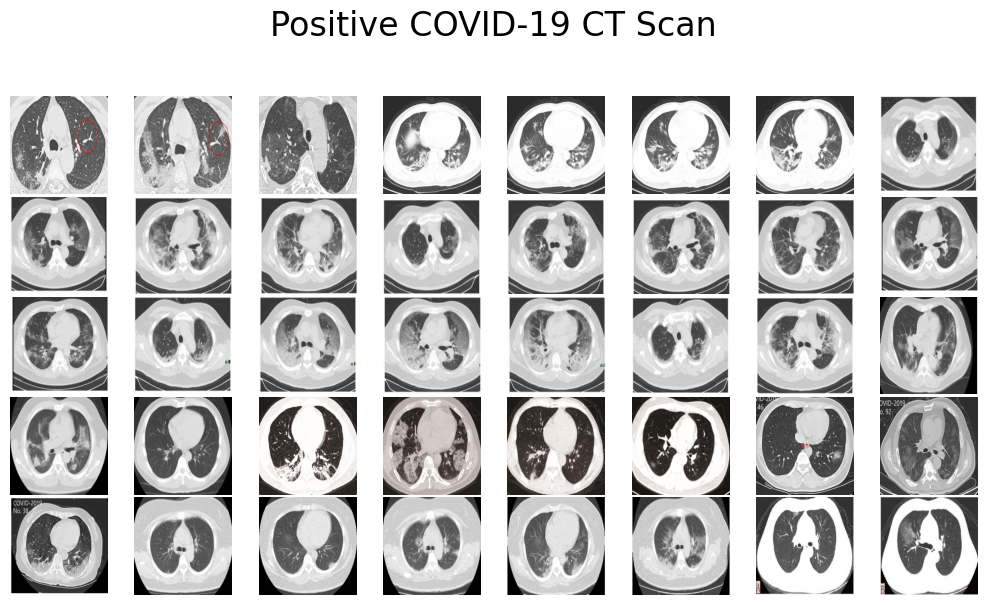

In [12]:
# Updated plot_images function
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        if i < len(images):  # Check if the image index is within the available images
            axi.imshow(images[i])
            axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

# Call the function with the updated code
plot_images(covid_images, 'Positive COVID-19 CT Scan')


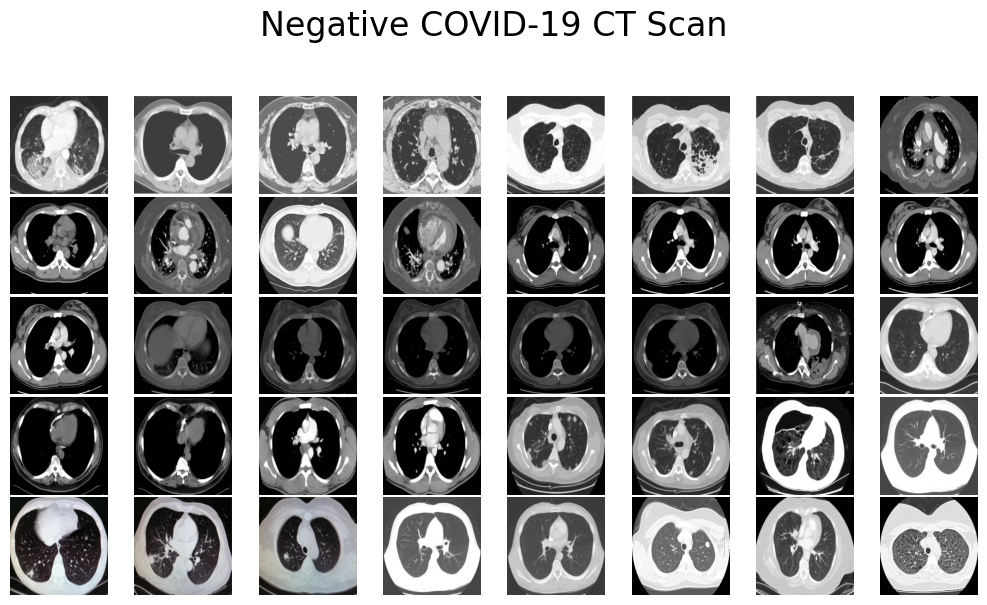

In [13]:
plot_images(noncovid_images, 'Negative COVID-19 CT Scan')

### **Normalization**
#### Model takes images in the form of array of pixels. Hence convert into array and *normalize*

In [14]:
# Convert to array and Normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

In [15]:
print(len(covid_images))
print(len(noncovid_images))

349
397


In [20]:
covid_labels=[]
for i in range(len(covid_images)):
    covid_labels.append("CT_COVID")
covid_labels    

['CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',
 'CT_COVID',

### **Train Test Split**

In [21]:
# split into training and testing
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)

In [22]:
noncovid_labels=[]
for i in range(len(noncovid_images)):
    noncovid_labels.append("CT_NonCOVID")
noncovid_labels    

['CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_NonCOVID',
 'CT_Non

In [23]:
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(
    noncovid_images, noncovid_labels, test_size=0.2)

In [25]:
X_train = np.concatenate((noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)

In [26]:
# make labels into categories - either 0 or 1
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

### Visualize a few images from Training and Test sets

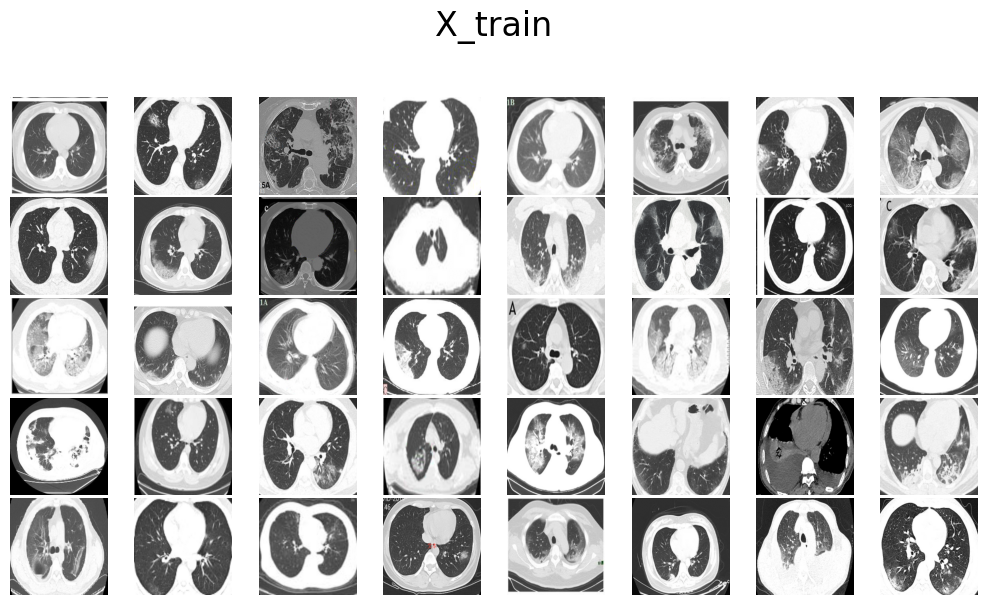

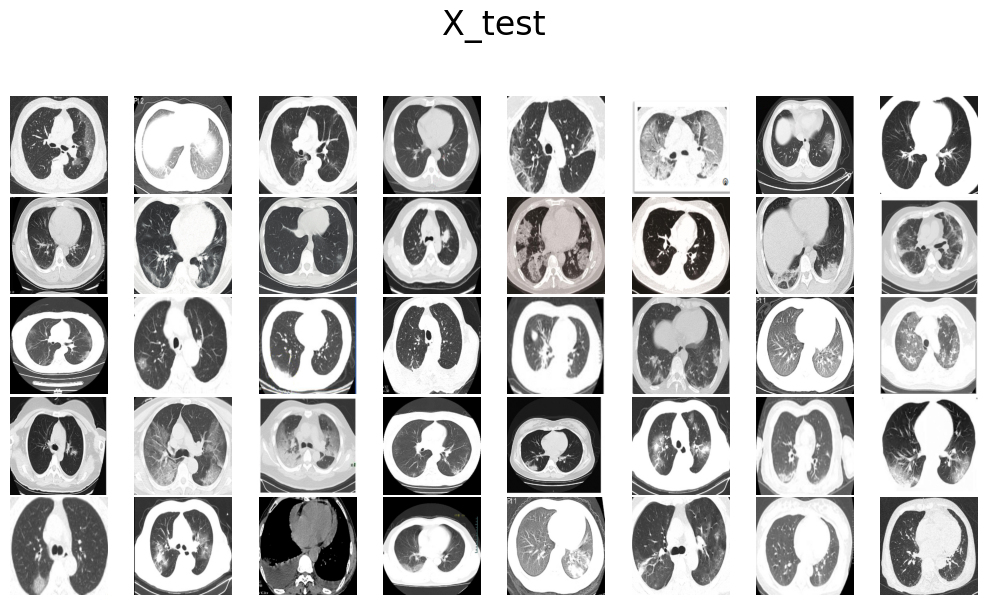

In [27]:
plot_images(covid_x_train, 'X_train')
plot_images(covid_x_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

### **Building and Visualizing model**

In [28]:
inception = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = inception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=inception.input, outputs=outputs)

for layer in inception.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

87910968/87910968 [==============================] - 117s 1us/step


In [29]:
# Visualize Model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

### **Image Augmentation**
#### To train on images at different positions, angles, flips, etc

In [30]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

### **Training the model**

The command you provided is used to train a neural network model in Keras using the fit method
 how many times the model will be trained on the entire training dataset
 Overall, this command is used to train a neural network model (model) using training data augmented with a data generator (train_aug). The model's performance is evaluated on the validation dataset (X_test, y_test) during training. The number of training steps and validation steps is determined based on the data size and batch size. Training continues for the specified number of epochs.

In [31]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/500
18/18 [==============================] - 52s 2s/step - loss: 5.4475 - accuracy: 0.5285 - val_loss: 1.8553 - val_accuracy: 0.6667
Epoch 2/500
18/18 [==============================] - 45s 2s/step - loss: 2.1169 - accuracy: 0.6762 - val_loss: 3.7017 - val_accuracy: 0.5467
Epoch 3/500
18/18 [==============================] - 35s 2s/step - loss: 1.3660 - accuracy: 0.7366 - val_loss: 1.5062 - val_accuracy: 0.7133
Epoch 4/500
18/18 [==============================] - 32s 2s/step - loss: 1.2697 - accuracy: 0.7433 - val_loss: 1.3973 - val_accuracy: 0.7200
Epoch 5/500
18/18 [==============================] - 33s 2s/step - loss: 1.3647 - accuracy: 0.7534 - val_loss: 1.5777 - val_accuracy: 0.6933
Epoch 6/500
18/18 [==============================] - 32s 2s/step - loss: 0.9574 - accuracy: 0.7802 - val_loss: 1.5022 - val_accuracy: 0.6533
Epoch 7/500
18/18 [==============================] - 33s 2s/step - loss: 1.1482 - accuracy: 0.7534 - val_loss: 1.4196 - val_accuracy: 0.6933
Epoch 8/500
1

Epoch 59/500
18/18 [==============================] - 29s 2s/step - loss: 1.2763 - accuracy: 0.8523 - val_loss: 3.5847 - val_accuracy: 0.7333
Epoch 60/500
18/18 [==============================] - 28s 2s/step - loss: 1.3725 - accuracy: 0.8389 - val_loss: 2.5476 - val_accuracy: 0.7467
Epoch 61/500
18/18 [==============================] - 29s 2s/step - loss: 1.7914 - accuracy: 0.8171 - val_loss: 3.0116 - val_accuracy: 0.7200
Epoch 62/500
18/18 [==============================] - 30s 2s/step - loss: 1.6551 - accuracy: 0.8289 - val_loss: 2.8264 - val_accuracy: 0.7400
Epoch 63/500
18/18 [==============================] - 30s 2s/step - loss: 1.8489 - accuracy: 0.8138 - val_loss: 4.0448 - val_accuracy: 0.7267
Epoch 64/500
18/18 [==============================] - 29s 2s/step - loss: 1.7808 - accuracy: 0.8440 - val_loss: 2.4728 - val_accuracy: 0.7600
Epoch 65/500
18/18 [==============================] - 29s 2s/step - loss: 1.4860 - accuracy: 0.8507 - val_loss: 2.4604 - val_accuracy: 0.7733
Epoch 

18/18 [==============================] - 28s 1s/step - loss: 1.5880 - accuracy: 0.8473 - val_loss: 3.8365 - val_accuracy: 0.7400
Epoch 117/500
18/18 [==============================] - 27s 1s/step - loss: 1.6627 - accuracy: 0.8624 - val_loss: 3.4419 - val_accuracy: 0.7333
Epoch 118/500
18/18 [==============================] - 27s 1s/step - loss: 1.5661 - accuracy: 0.8708 - val_loss: 4.0776 - val_accuracy: 0.7267
Epoch 119/500
18/18 [==============================] - 26s 1s/step - loss: 1.8663 - accuracy: 0.8171 - val_loss: 3.6341 - val_accuracy: 0.7400
Epoch 120/500
18/18 [==============================] - 28s 2s/step - loss: 1.7887 - accuracy: 0.8440 - val_loss: 2.9270 - val_accuracy: 0.7467
Epoch 121/500
18/18 [==============================] - 28s 2s/step - loss: 2.9010 - accuracy: 0.7919 - val_loss: 5.9093 - val_accuracy: 0.6933
Epoch 122/500
18/18 [==============================] - 27s 1s/step - loss: 2.2208 - accuracy: 0.8389 - val_loss: 3.1173 - val_accuracy: 0.7467
Epoch 123/500

18/18 [==============================] - 28s 2s/step - loss: 1.7891 - accuracy: 0.8406 - val_loss: 3.8113 - val_accuracy: 0.7867
Epoch 174/500
18/18 [==============================] - 27s 1s/step - loss: 2.0825 - accuracy: 0.8523 - val_loss: 3.8166 - val_accuracy: 0.7800
Epoch 175/500
18/18 [==============================] - 28s 2s/step - loss: 1.9694 - accuracy: 0.8641 - val_loss: 3.6947 - val_accuracy: 0.7667
Epoch 176/500
18/18 [==============================] - 28s 2s/step - loss: 2.2502 - accuracy: 0.8473 - val_loss: 3.6353 - val_accuracy: 0.7600
Epoch 177/500
18/18 [==============================] - 28s 2s/step - loss: 1.5649 - accuracy: 0.8708 - val_loss: 3.6133 - val_accuracy: 0.7600
Epoch 178/500
18/18 [==============================] - 29s 2s/step - loss: 2.1473 - accuracy: 0.8507 - val_loss: 4.6939 - val_accuracy: 0.7667
Epoch 179/500
18/18 [==============================] - 27s 1s/step - loss: 1.9998 - accuracy: 0.8691 - val_loss: 4.0078 - val_accuracy: 0.7800
Epoch 180/500

18/18 [==============================] - 28s 2s/step - loss: 2.0549 - accuracy: 0.8591 - val_loss: 5.0754 - val_accuracy: 0.7133
Epoch 231/500
18/18 [==============================] - 28s 2s/step - loss: 1.7194 - accuracy: 0.8708 - val_loss: 3.9158 - val_accuracy: 0.7467
Epoch 232/500
18/18 [==============================] - 28s 1s/step - loss: 1.8768 - accuracy: 0.8540 - val_loss: 6.7824 - val_accuracy: 0.7133
Epoch 233/500
18/18 [==============================] - 28s 1s/step - loss: 1.9295 - accuracy: 0.8674 - val_loss: 3.8978 - val_accuracy: 0.7467
Epoch 234/500
18/18 [==============================] - 28s 1s/step - loss: 1.8375 - accuracy: 0.8758 - val_loss: 4.2769 - val_accuracy: 0.7667
Epoch 235/500
18/18 [==============================] - 28s 2s/step - loss: 2.1585 - accuracy: 0.8691 - val_loss: 4.2954 - val_accuracy: 0.7667
Epoch 236/500
18/18 [==============================] - 27s 1s/step - loss: 1.7705 - accuracy: 0.8775 - val_loss: 4.0284 - val_accuracy: 0.7400
Epoch 237/500

18/18 [==============================] - 32s 2s/step - loss: 3.1001 - accuracy: 0.8389 - val_loss: 4.7470 - val_accuracy: 0.7733
Epoch 288/500
18/18 [==============================] - 32s 2s/step - loss: 2.8868 - accuracy: 0.8255 - val_loss: 5.2910 - val_accuracy: 0.7533
Epoch 289/500
18/18 [==============================] - 32s 2s/step - loss: 2.2274 - accuracy: 0.8674 - val_loss: 4.4141 - val_accuracy: 0.7533
Epoch 290/500
18/18 [==============================] - 32s 2s/step - loss: 2.3725 - accuracy: 0.8725 - val_loss: 4.0508 - val_accuracy: 0.7733
Epoch 291/500
18/18 [==============================] - 32s 2s/step - loss: 1.9581 - accuracy: 0.8826 - val_loss: 4.0138 - val_accuracy: 0.7733
Epoch 292/500
18/18 [==============================] - 33s 2s/step - loss: 2.1695 - accuracy: 0.8775 - val_loss: 3.7836 - val_accuracy: 0.7867
Epoch 293/500
18/18 [==============================] - 31s 2s/step - loss: 2.0352 - accuracy: 0.8758 - val_loss: 4.1971 - val_accuracy: 0.7600
Epoch 294/500

18/18 [==============================] - 29s 2s/step - loss: 2.2530 - accuracy: 0.8792 - val_loss: 4.4057 - val_accuracy: 0.7667
Epoch 345/500
18/18 [==============================] - 28s 2s/step - loss: 1.5340 - accuracy: 0.9010 - val_loss: 5.8382 - val_accuracy: 0.7200
Epoch 346/500
18/18 [==============================] - 29s 2s/step - loss: 1.8521 - accuracy: 0.8775 - val_loss: 4.4128 - val_accuracy: 0.7733
Epoch 347/500
18/18 [==============================] - 27s 1s/step - loss: 2.2479 - accuracy: 0.8792 - val_loss: 5.6834 - val_accuracy: 0.7600
Epoch 348/500
18/18 [==============================] - 27s 1s/step - loss: 2.4546 - accuracy: 0.8775 - val_loss: 5.6202 - val_accuracy: 0.7400
Epoch 349/500
18/18 [==============================] - 29s 2s/step - loss: 2.3549 - accuracy: 0.8557 - val_loss: 4.9901 - val_accuracy: 0.7533
Epoch 350/500
18/18 [==============================] - 28s 2s/step - loss: 2.1123 - accuracy: 0.8809 - val_loss: 4.8693 - val_accuracy: 0.7800
Epoch 351/500

18/18 [==============================] - 27s 1s/step - loss: 2.3465 - accuracy: 0.8960 - val_loss: 4.0639 - val_accuracy: 0.8133
Epoch 402/500
18/18 [==============================] - 28s 1s/step - loss: 2.6056 - accuracy: 0.8557 - val_loss: 4.3820 - val_accuracy: 0.8000
Epoch 403/500
18/18 [==============================] - 27s 1s/step - loss: 1.8746 - accuracy: 0.8842 - val_loss: 5.2885 - val_accuracy: 0.7333
Epoch 404/500
18/18 [==============================] - 28s 2s/step - loss: 1.8725 - accuracy: 0.8960 - val_loss: 4.3544 - val_accuracy: 0.7867
Epoch 405/500
18/18 [==============================] - 29s 2s/step - loss: 1.8874 - accuracy: 0.8893 - val_loss: 5.7462 - val_accuracy: 0.7333
Epoch 406/500
18/18 [==============================] - 28s 1s/step - loss: 2.9345 - accuracy: 0.8540 - val_loss: 4.6717 - val_accuracy: 0.8000
Epoch 407/500
18/18 [==============================] - 28s 2s/step - loss: 2.2716 - accuracy: 0.8742 - val_loss: 7.0772 - val_accuracy: 0.6867
Epoch 408/500

18/18 [==============================] - 30s 2s/step - loss: 2.3976 - accuracy: 0.8775 - val_loss: 4.1037 - val_accuracy: 0.8000
Epoch 459/500
18/18 [==============================] - 28s 2s/step - loss: 2.1996 - accuracy: 0.8809 - val_loss: 3.8319 - val_accuracy: 0.8200
Epoch 460/500
18/18 [==============================] - 29s 2s/step - loss: 2.4695 - accuracy: 0.8792 - val_loss: 3.9672 - val_accuracy: 0.7933
Epoch 461/500
18/18 [==============================] - 28s 2s/step - loss: 2.4557 - accuracy: 0.8708 - val_loss: 5.2848 - val_accuracy: 0.7800
Epoch 462/500
18/18 [==============================] - 28s 2s/step - loss: 2.0680 - accuracy: 0.8876 - val_loss: 4.9498 - val_accuracy: 0.7800
Epoch 463/500
18/18 [==============================] - 28s 1s/step - loss: 2.0053 - accuracy: 0.9027 - val_loss: 4.6536 - val_accuracy: 0.7933
Epoch 464/500
18/18 [==============================] - 28s 1s/step - loss: 2.5012 - accuracy: 0.8826 - val_loss: 3.9652 - val_accuracy: 0.8000
Epoch 465/500

In [32]:
# Save Model and Weights
model.save('inception_ct.h5')
model.save_weights('inception_weights_ct.hdf5')

C:\Users\10\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
# Load saved model
model = load_model('inception_ct.h5')

### **Making Predicions**

In [37]:
y_pred = model.predict(X_test, batch_size=batch_size)

5/5 [==============================] - 8s 1s/step


### Visulaizing First 10 predictions

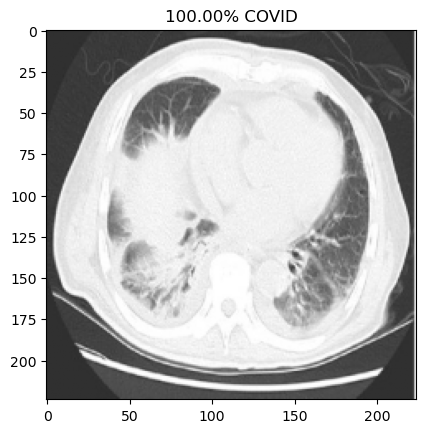

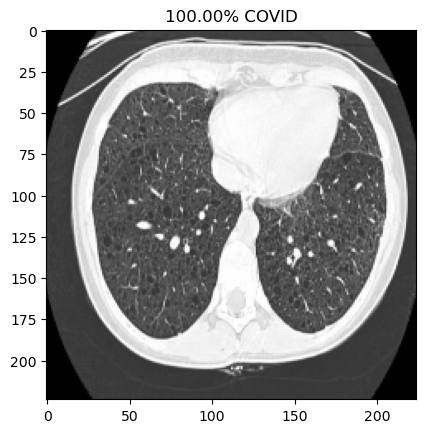

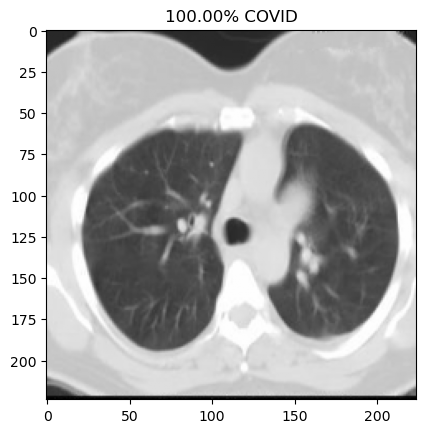

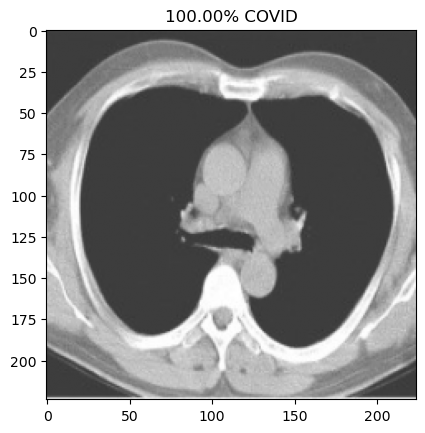

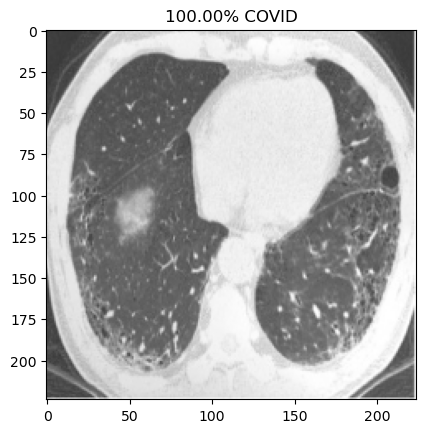

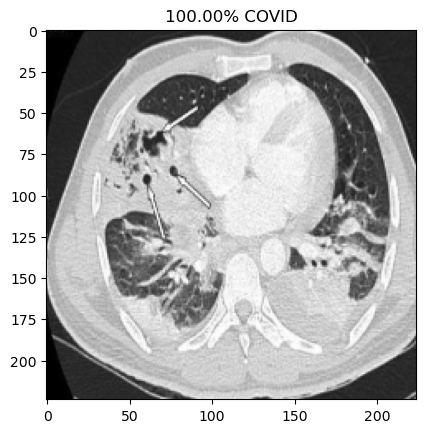

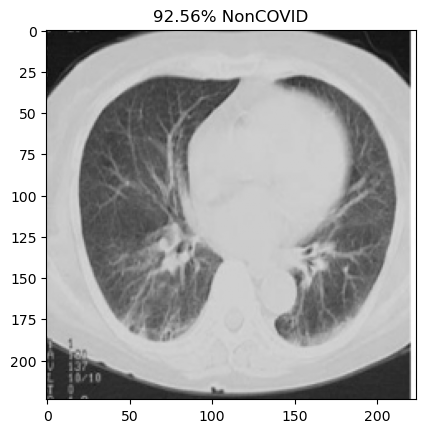

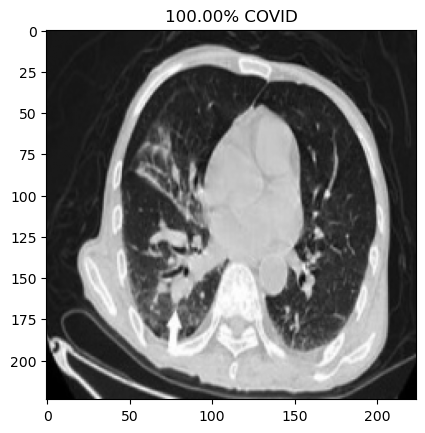

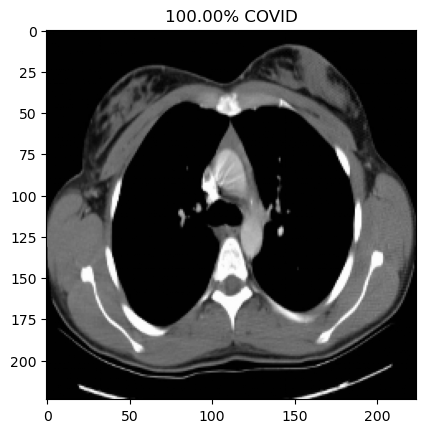

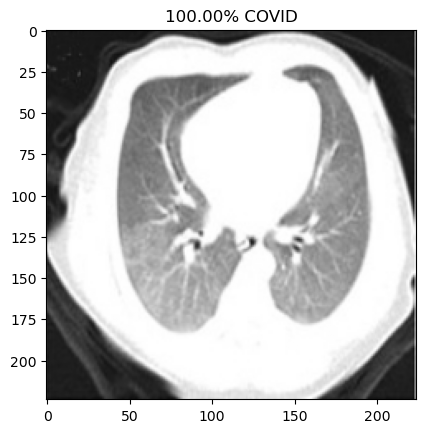

In [38]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.style.reload_library
  plt.imshow(X_test[index])
  plt.show()

In [39]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

### Plot ROC Curve

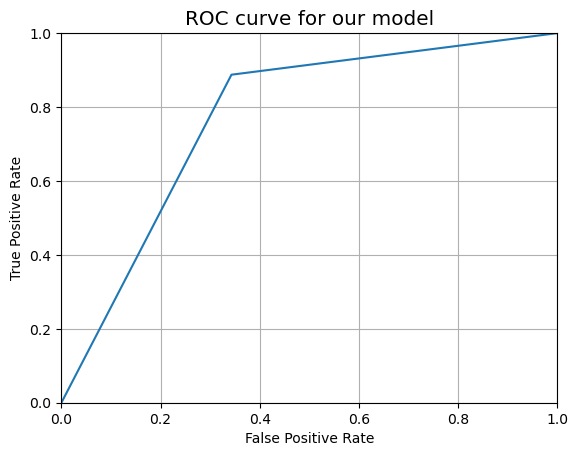

In [40]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### Plot Confusion Matrix

Confusion Matrix without Normalization


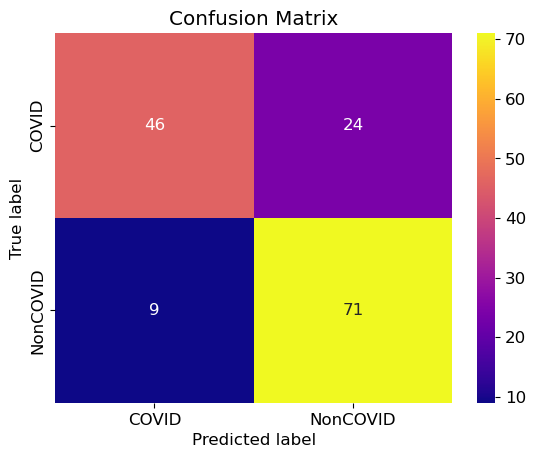

Confusion Matrix with Normalized Values


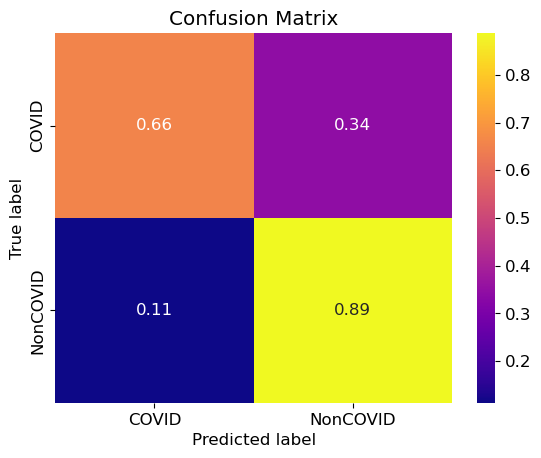

In [41]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','NonCOVID']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

### **Classification Report**

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74        70
           1       0.75      0.89      0.81        80

    accuracy                           0.78       150
   macro avg       0.79      0.77      0.77       150
weighted avg       0.79      0.78      0.78       150



### **Accuracy and Loss Plots**

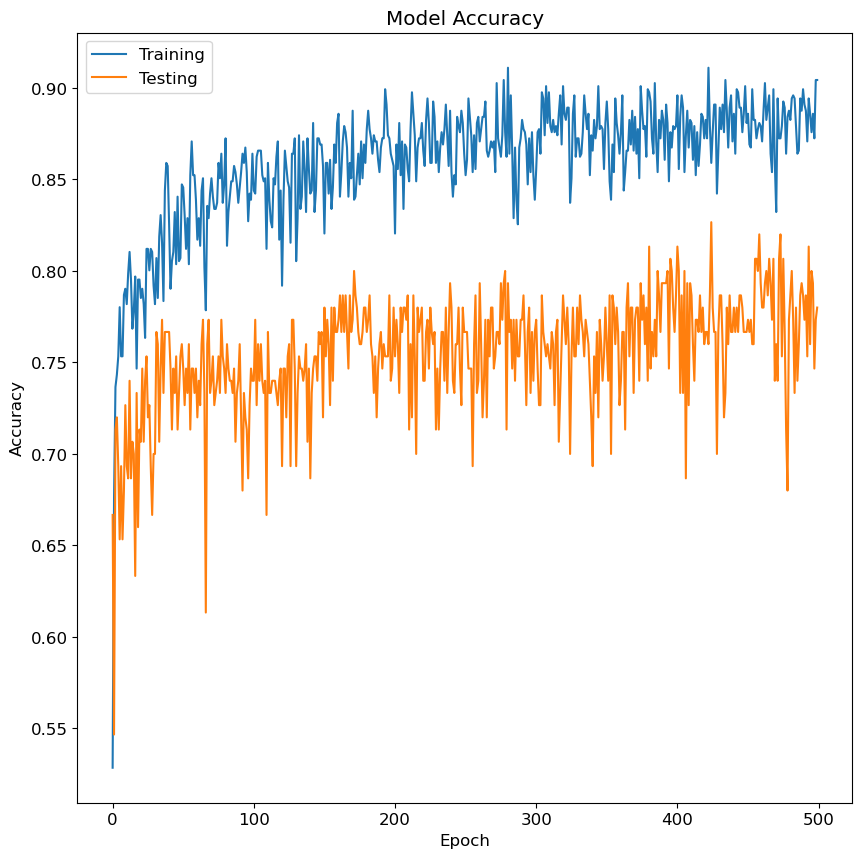

In [43]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_ct_accuracy.png')
plt.show()


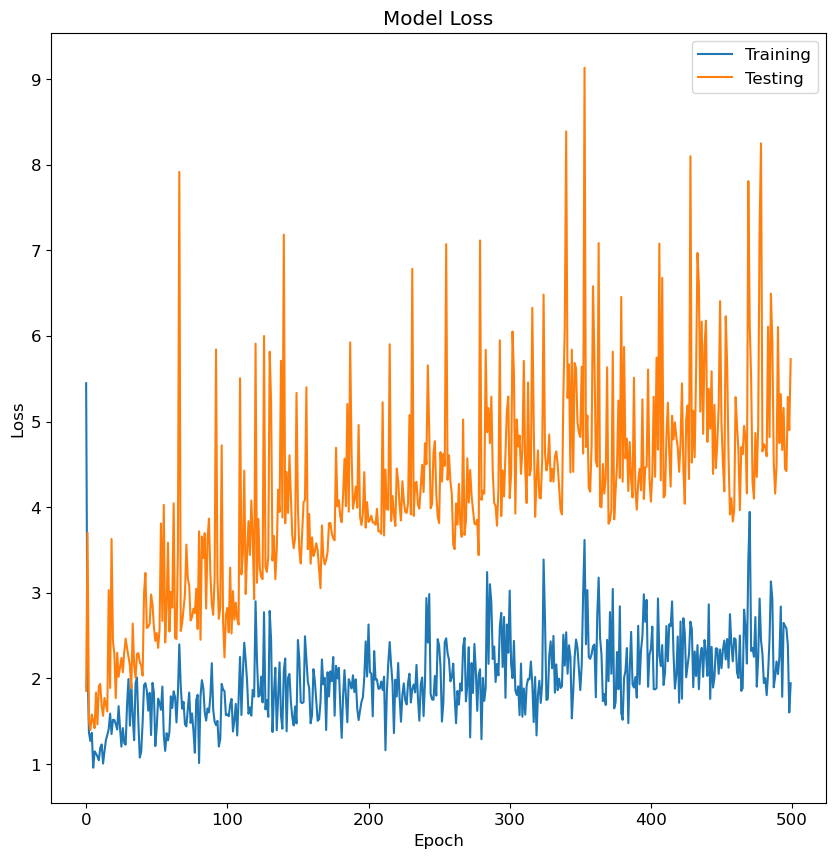

In [44]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_ct_loss.png')
plt.show()